## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings

# Ignore all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

## Importing the dataset

In [3]:
dataset=pd.read_csv("finalf.csv")

In [4]:
dataset.head(5)

,Area,N,P,K,EC,pH,Soil type,Temperature,Rainfall,Crop
0,Anamalai,148.41,12.63,470.60,0.27,6.97,Anamalai Series,24,750,Banana
1,Periyapothu,159.66,13.96,513.38,0.18,6.93,Anamalai Series,27,705,Banana
2,A.Mettupalayam,187.52,11.35,672.23,0.45,7.56,Peelamedu Series,24,670,Banana
3,A.Sengappalli,178.74,12.58,537.35,0.33,7.53,Peelamedu Series,22,678,Banana
4,Allapalayam,183.08,13.71,568.30,0.77,7.53,Peelamedu Series,27,689,Banana


In [5]:
dataset.shape

(1162, 10)

In [6]:
dataset.columns.unique()

Index(['Area', 'N', 'P', 'K', 'EC', 'pH', 'Soil type', 'Temperature',
       'Rainfall', 'Crop'],
      dtype='object')

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162 entries, 0 to 1161
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1162 non-null   object 
 1   N            1162 non-null   float64
 2   P            1162 non-null   float64
 3   K            1162 non-null   float64
 4   EC           1162 non-null   float64
 5   pH           1162 non-null   float64
 6   Soil type    1162 non-null   object 
 7   Temperature  1162 non-null   int64  
 8   Rainfall     1162 non-null   int64  
 9   Crop         1162 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 90.9+ KB


We can note that there are no null values in the dataset and also there is no need for the further cleaning of the dataset

In [8]:
dataset.describe()

,N,P,K,EC,pH,Temperature,Rainfall
count,1162.000000,1162.000000,1162.00000,1162.000000,1162.000000,1162.000000,1162.000000
mean,203.205516,14.432022,613.10969,0.347814,7.566274,27.785714,880.905336
std,81.920226,1.742593,122.18442,0.109348,0.357118,4.221846,602.909810
min,139.930000,3.710000,106.69000,0.090000,6.580000,15.000000,204.000000
25%,181.570000,13.240000,537.39750,0.270000,7.360000,25.000000,512.250000
50%,195.040000,14.125000,602.91000,0.340000,7.520000,28.000000,632.000000
75%,212.205000,15.325000,681.17000,0.410000,7.680000,31.000000,1050.000000
max,2154.950000,27.440000,1118.20000,1.330000,9.330000,39.000000,4207.000000


In [9]:
dataset[dataset.duplicated()]

,Area,N,P,K,EC,pH,Soil type,Temperature,Rainfall,Crop


In [10]:
import re
dataset.columns=[re.sub(" ","_",x) for x in dataset.columns]

There are ni duplicates in the dataset

In [11]:
dataset.Soil_type.unique()

array(['Anamalai Series', 'Peelamedu Series', 'Irugur Series',
       'Palladam Series', 'Somaiyanur Series', 'Palathurai Series',
       'Dasarapatti Series', 'Vellalur Series', 'Pichanur Series'],
      dtype=object)

In [12]:
dataset.Soil_type.nunique()

9

In [13]:
dataset.Crop.unique()

array(['Banana', 'Bengalgram', 'Bhendi', 'Brinjal', 'Blackgram', 'Onion',
       'Paddy', 'Redgram', 'Sugarcane', 'Tapioca', 'Cotton', 'Cowpea',
       'Cumbu', 'Greengram', 'Groundnut', 'Sorghum', 'Horsegram',
       'Tomato', 'Turmeric', 'Coconut'], dtype=object)

In [14]:
dataset.Crop.nunique()

20

In [24]:
crop_summary = pd.pivot_table(dataset, index=['Crop'], aggfunc='mean')
crop_summary.head(20)

,EC,K,N,P,Rainfall,Temperature,pH
Crop,,,,,,,
Banana,0.307619,621.399048,211.221714,12.894095,695.409524,24.400000,7.250190
Bengalgram,0.481739,752.276087,188.265217,20.180000,512.565217,22.086957,7.913913
Bhendi,0.266471,555.322353,198.171765,13.862353,940.647059,25.882353,7.611176
Blackgram,0.371739,839.529130,221.004783,15.120435,649.434783,28.826087,7.551739
Brinjal,0.518125,686.463750,192.369375,14.123125,793.812500,18.437500,7.601875
Coconut,0.324570,523.288495,190.719462,14.512312,1605.268817,27.521505,7.351022
Cotton,0.397143,584.170714,182.136429,14.189286,606.500000,29.071429,7.785000
Cowpea,0.320179,634.910982,203.782232,14.289911,513.258929,25.178571,7.457589
Cumbu,0.412941,741.477647,192.394118,15.014118,305.000000,32.176471,7.633529


It is giving us the information of the mean values of every features of each crop

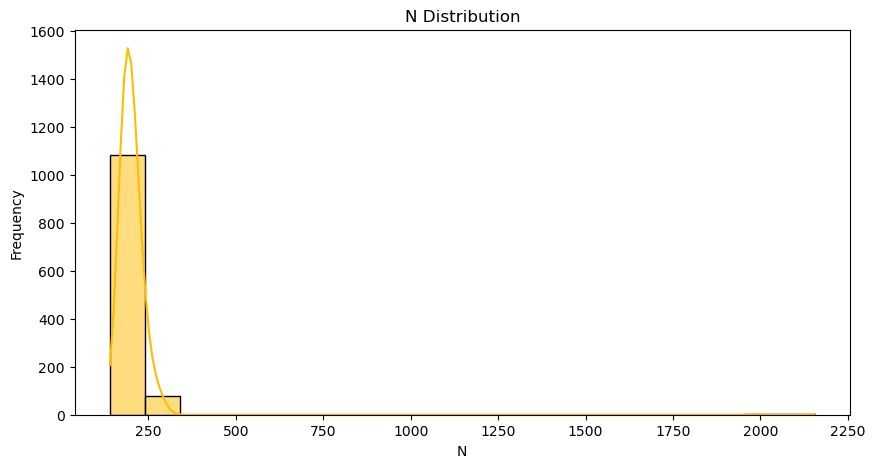

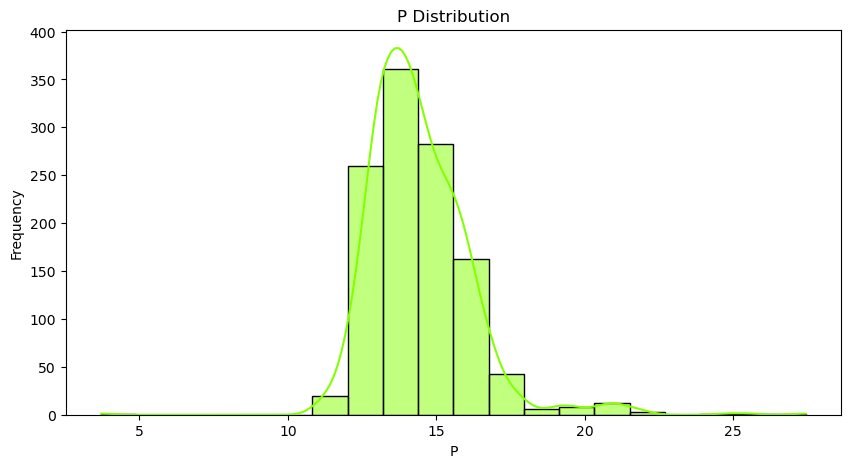

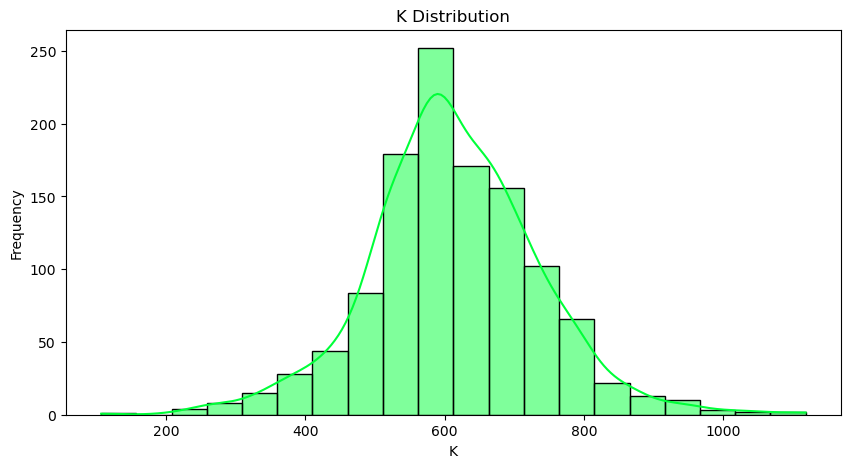

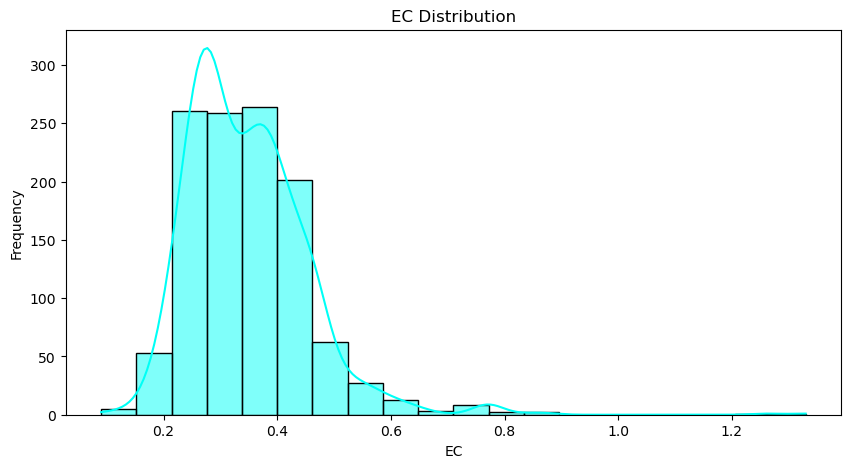

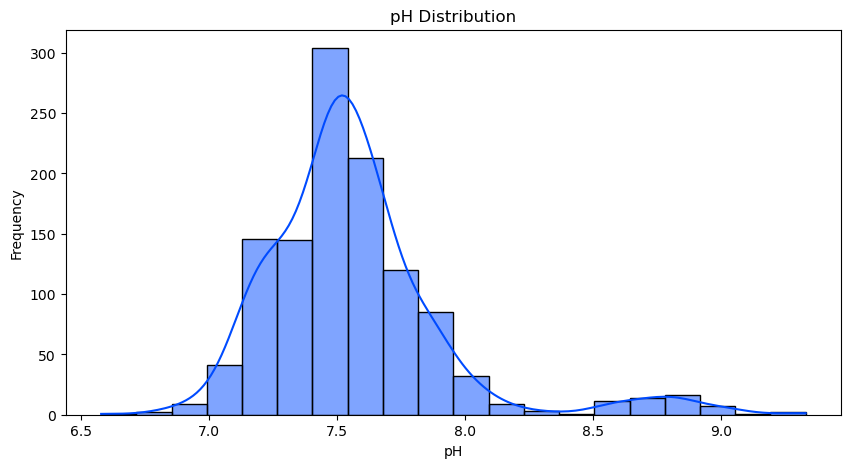

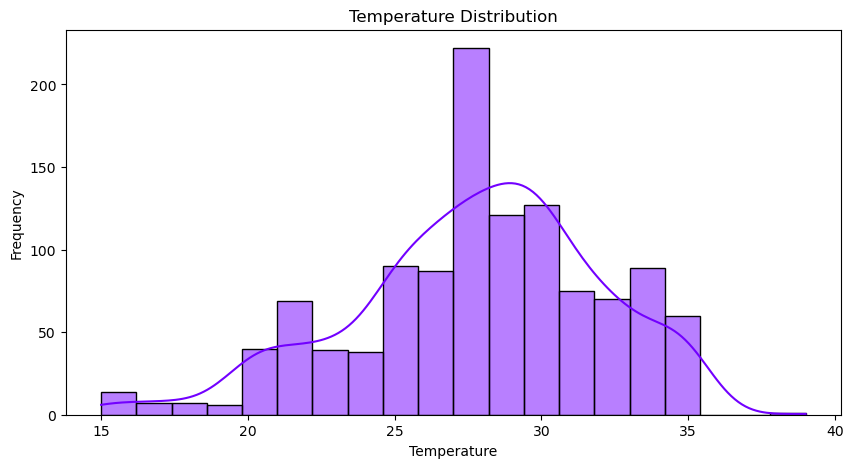

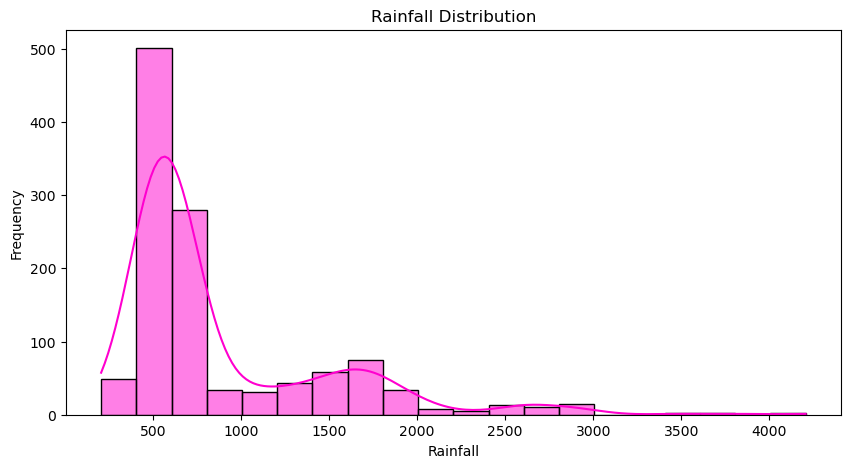

In [17]:
# Defining numerical columns and a custom rainbow-like color palette
numerical_columns = ["N", "P", "K", "EC", "pH", "Temperature", "Rainfall"]
rainbow_palette = sns.color_palette("hsv", n_colors=len(numerical_columns))

for col, color in zip(numerical_columns, rainbow_palette):
    # Creating subplots
    plt.figure(figsize=(10, 5))  #figure size

    # Ploting the histogram with custom colors
    sns.histplot(dataset[col], bins=20, kde=True, color=color)

    # Adding labels and titles
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"{col} Distribution")
    plt.show()

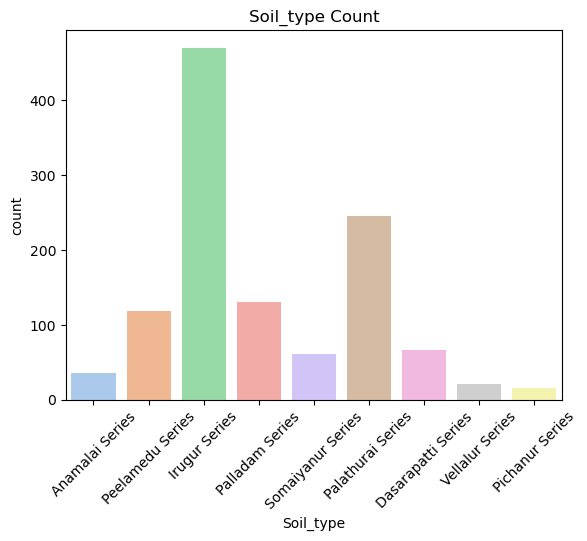

In [18]:
color_palette = sns.color_palette("pastel", n_colors=len(dataset["Soil_type"].unique()))
# Creating a countplot with transparent colors
sns.countplot(data=dataset, x='Soil_type', palette=color_palette, alpha=1)
plt.title("Soil_type Count")
plt.xticks(rotation=45)  # Adjust rotation angle for better visibility
plt.show()

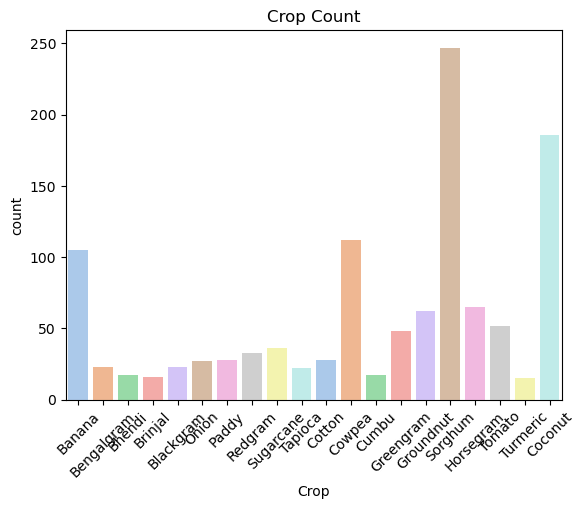

In [19]:
color_palette = sns.color_palette("pastel", n_colors=len(dataset["Crop"].unique()))
# Creating a countplot with transparent colors
sns.countplot(data=dataset, x='Crop', palette=color_palette, alpha=1)
plt.title("Crop Count")
plt.xticks(rotation=45)  # Adjust rotation angle for better visibility
plt.show()

We can find that groundnut is more grown in the areas of tamil nadu

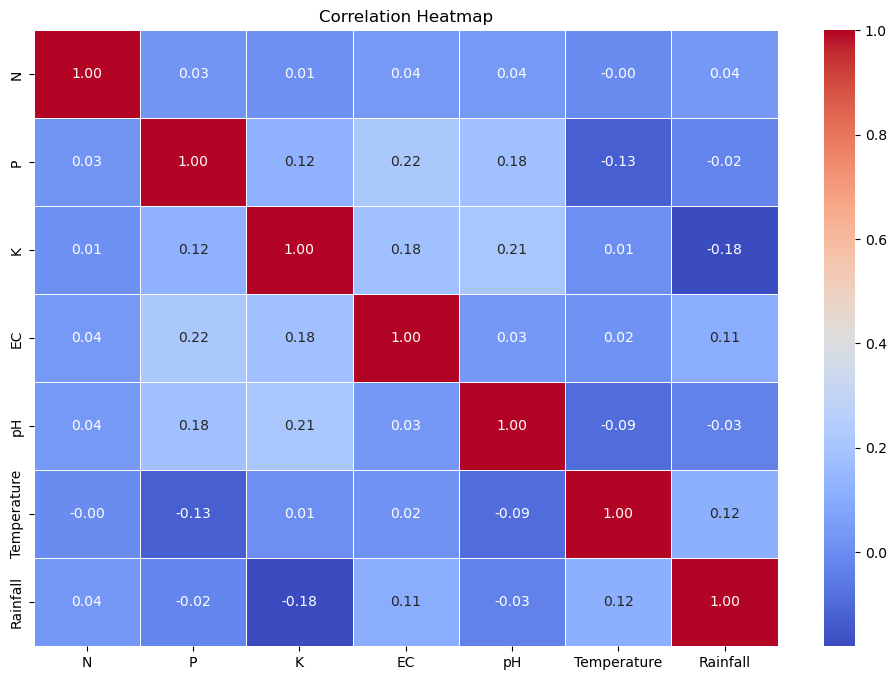

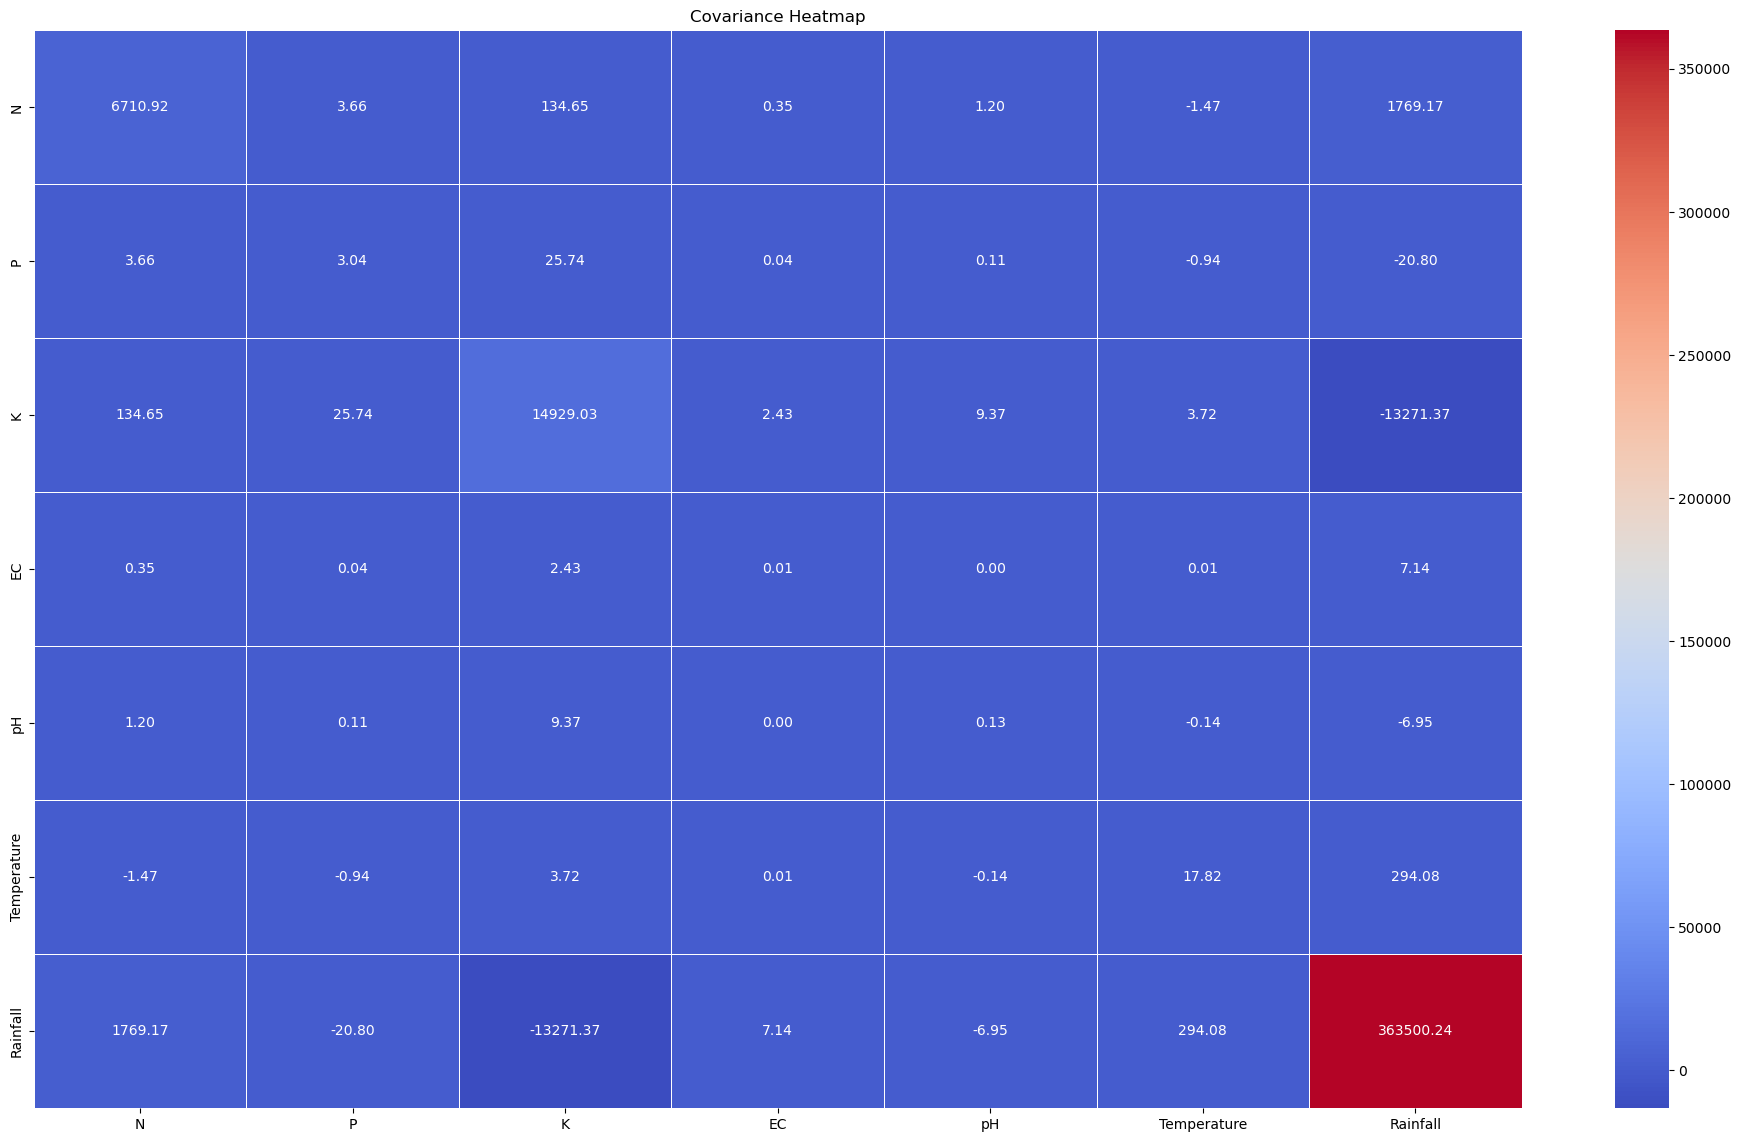

In [20]:
numeric_columns_for_heatmap = dataset.columns.unique()

# Calculate the correlation matrix
correlation_matrix = dataset[numeric_columns_for_heatmap].corr()

# Calculate the covariance matrix
covariance_matrix = dataset[numeric_columns_for_heatmap].cov()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

# Plot covariance heatmap
plt.figure(figsize=(24, 14))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Covariance Heatmap")
plt.show()